#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [4]:
# number of rows , data type , number of non null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
# Id column unsefull column(every value in every row is an uniqe values)
# Notes and Status empty columns

In [7]:
df.drop(columns=['Notes','Status','Id'],inplace=True,axis=1)

In [8]:
# check for duplicated values
df.duplicated().sum()

3

In [9]:
df[df.duplicated()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148650,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [10]:
# null rows

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# number of null values in every column

In [13]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [14]:
# null values:
# BasePay :        606
# OvertimePay :    1
# OtherPay  :      1
# Benefits  :      36160

In [15]:
# basic statistics for numerical data
# the TotalPay column in this table represent the basic statistics

In [16]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148651.000000,148651.000000,148651.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74769.830909,93694.445667,2012.522613
std,42764.635495,11454.380559,8056.601866,15402.215858,50516.398338,62792.756431,1.117529
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36169.340000,44071.405000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71427.220000,92406.010000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105841.940000,132877.495000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [17]:
# or

In [18]:
mean_salary = df['TotalPay'].mean()
print(mean_salary)

74769.83090850382


In [19]:
median_salary = df['TotalPay'].median()
print(median_salary)

71427.22


In [20]:
mode_salary = df['TotalPay'].mode()
print(mode_salary)

0    0.0
Name: TotalPay, dtype: float64


In [21]:
std_salary = df['TotalPay'].std()
print(std_salary)

50516.39833778189


In [22]:
min_salary = df['TotalPay'].min()
print(min_salary)

-618.13


In [23]:
max_salary = df['TotalPay'].max()
print(max_salary)

567595.43


In [24]:
salary_range = max_salary - min_salary
print(f"Salary range: {salary_range}")

Salary range: 568213.56


In [25]:
# spliting data to numerical and categorical

In [26]:
df_num_features = df.select_dtypes(include='number')
df_num_features.columns

Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'Year'],
      dtype='object')

In [27]:
# we can consider Year column as categorical data

In [28]:
df_num_features.drop(columns='Year',inplace=True,axis=1)

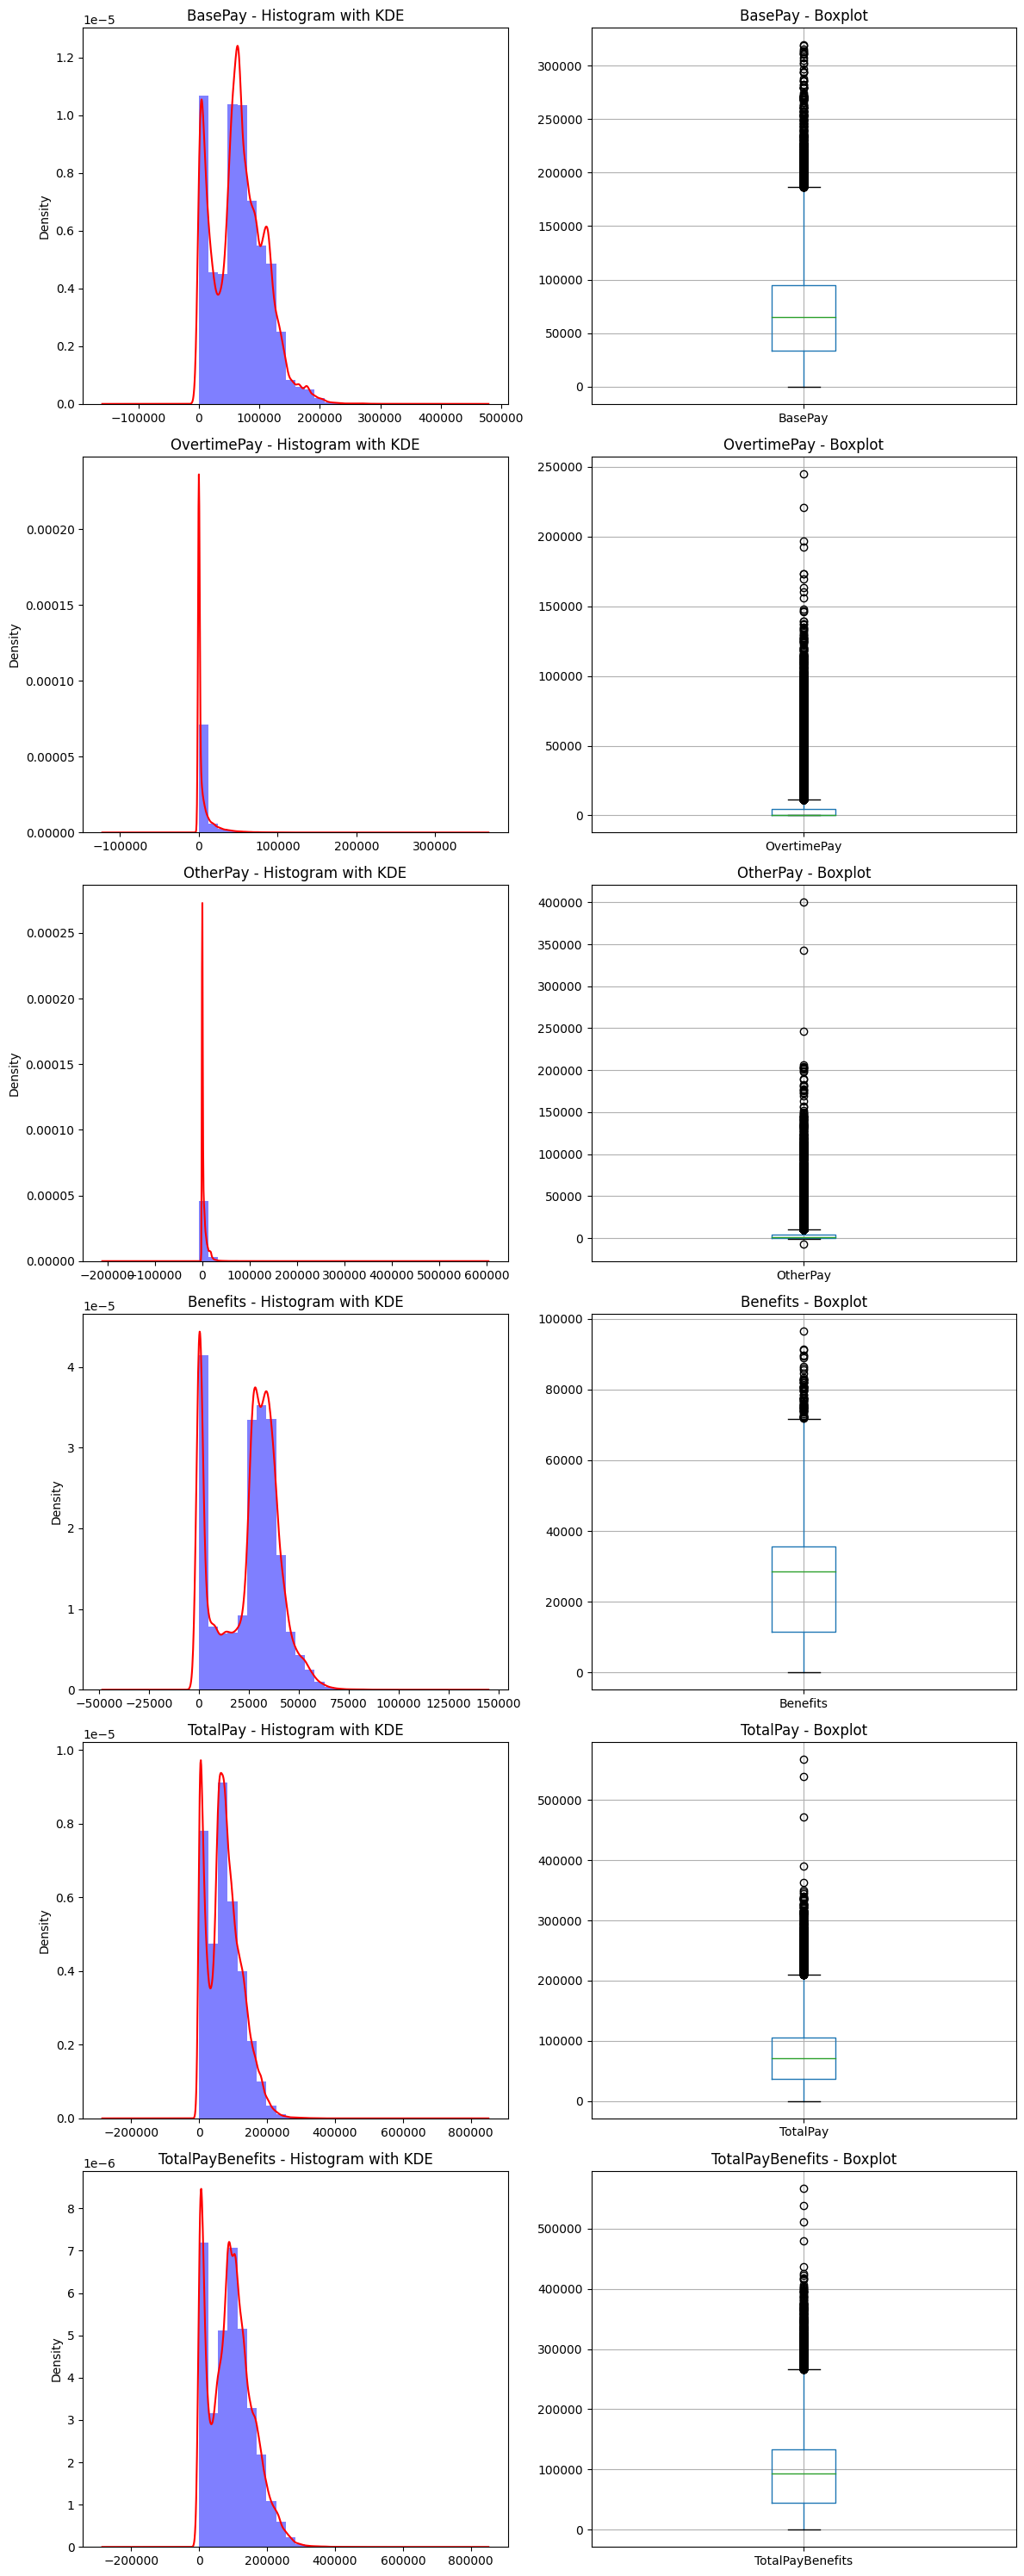

In [29]:
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_num_features.columns), 2, figsize=(12, 5 * len(df_num_features.columns)))

for i, col in enumerate(df_num_features.columns):
    # Histogram with KDE
    df_num_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_num_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_num_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()


In [30]:
# fill nulls values
# BasePay     -> fill by mean   >> the data is likely to be normally distributed
# OvertimePay -> fill by median >> the distribution might be right-skewed
# OtherPay    -> fill by mean   >> the distribution may be right-skewed, but the std is not extremely high
# Benefits    -> fill by zeros  >> We can consider that there are no benefits


In [31]:
basePay_mean = df['BasePay'].mean()
df['BasePay'].fillna(basePay_mean, inplace=True)

In [32]:
overtimePay_mean = df['OvertimePay'].mean()
df['OvertimePay'].fillna(overtimePay_mean, inplace=True)

In [33]:
otherPay_mean = df['OtherPay'].mean()
df['OtherPay'].fillna(otherPay_mean, inplace=True)

In [34]:
df['Benefits'].fillna(0, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148651 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148651 non-null  object 
 1   JobTitle          148651 non-null  object 
 2   BasePay           148651 non-null  float64
 3   OvertimePay       148651 non-null  float64
 4   OtherPay          148651 non-null  float64
 5   Benefits          148651 non-null  float64
 6   TotalPay          148651 non-null  float64
 7   TotalPayBenefits  148651 non-null  float64
 8   Year              148651 non-null  int64  
 9   Agency            148651 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 12.5+ MB


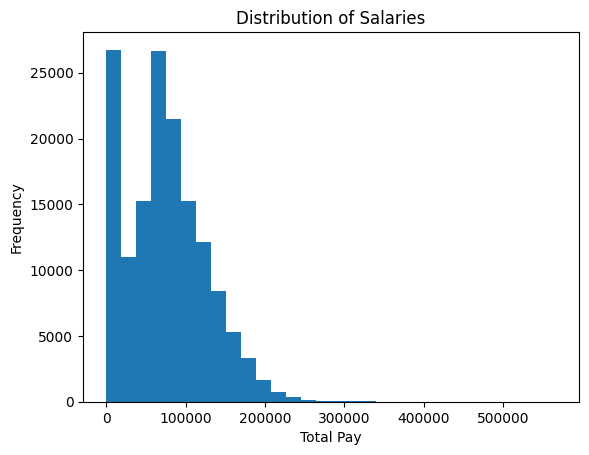

In [36]:
# distribution of salaries
df['TotalPay'].plot(kind='hist', bins=30, title='Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

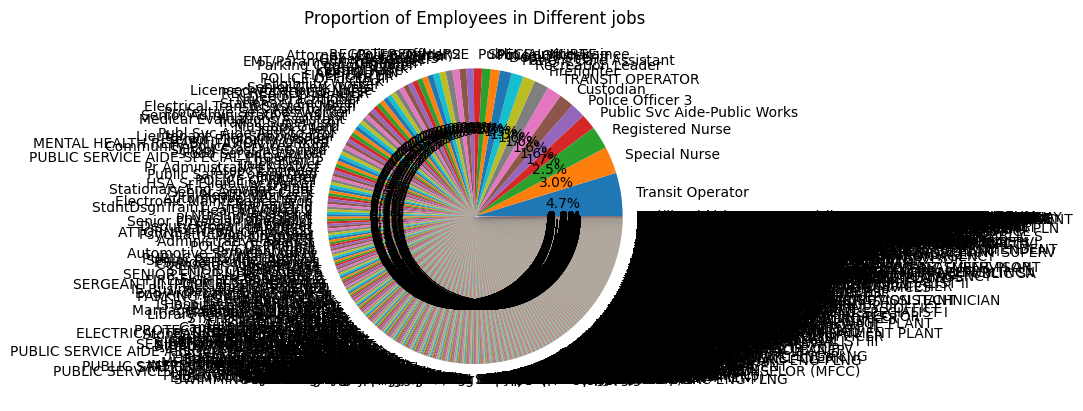

In [37]:
job_counts = df['JobTitle'].value_counts()
job_counts.plot(kind='pie', autopct='%1.1f%%', title='Proportion of Employees in Different jobs')
plt.ylabel('')
plt.show()

In [38]:
print(job_counts)

Transit Operator                            7036
Special Nurse                               4389
Registered Nurse                            3736
Public Svc Aide-Public Works                2518
Police Officer 3                            2421
                                            ... 
TRIAL DELAY REDUCTION COORDINATOR              1
POWERHOUSE ELECTRICIAN SUPERVISOR II           1
CHIEF NURSERY SPECIALIST                       1
EMERGENCY PROTECTIVE ORDERS COMMISSIONER       1
Not provided                                   1
Name: JobTitle, Length: 2159, dtype: int64


In [39]:
# Group the data by JobTitle and calculate average salary for each group
data1 = df.groupby('JobTitle')
avg_salary1=df['TotalPay'].mean()
print("Average Salary by JobTitle :")
print(avg_salary1)

Average Salary by JobTitle :
74769.83090850382


In [40]:
data2 = df.groupby(['JobTitle', 'BasePay'])
avg_salary2 = data2['TotalPay'].mean()

print(avg_salary2)


JobTitle            BasePay 
ACCOUNT CLERK       614.00        614.00
                    1630.00      1630.00
                    8681.58      8751.40
                    11247.02    11247.02
                    17737.91    17737.91
                                  ...   
Youth Comm Advisor  13915.80    19212.71
                    32417.42    36465.91
                    52433.88    52433.88
                    57544.73    57544.73
ZOO CURATOR         43148.00    66686.56
Name: TotalPay, Length: 114048, dtype: float64


In [41]:
grouped_data = df.groupby('JobTitle').agg({
    'BasePay': ['mean','median','std','max','min'],
    'OvertimePay': ['mean','median','std','max','min'],
    'OtherPay': ['mean','median','std','max','min'],
    'Benefits': ['mean','median','std','max','min'],
    'TotalPay': ['mean','median','std','max','min'],
    'TotalPayBenefits': ['mean','median','std','max','min']
})

# Display the result
print(grouped_data)


                                                     BasePay             \
                                                        mean     median   
JobTitle                                                                  
ACCOUNT CLERK                                   43300.806506  49777.780   
ACCOUNTANT                                      46643.172000  60076.240   
ACCOUNTANT INTERN                               28732.663958  16806.755   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000  62290.780   
ACUPUNCTURIST                                   66374.400000  66374.400   
...                                                      ...        ...   
X-RAY LABORATORY AIDE                           47664.773077  54066.080   
X-Ray Laboratory Aide                           46086.387100  55251.635   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.910000  52609.910   
Youth Comm Advisor                              39077.957500  42425.650   
ZOO CURATOR              

In [42]:
# correlation between 'TotalPay' and OvertimePay
correlation = df['TotalPay'].corr(df['OvertimePay'])
print("Correlation between TotalPay and OvertimePay:", correlation)


Correlation between TotalPay and OvertimePay: 0.5048551502406475


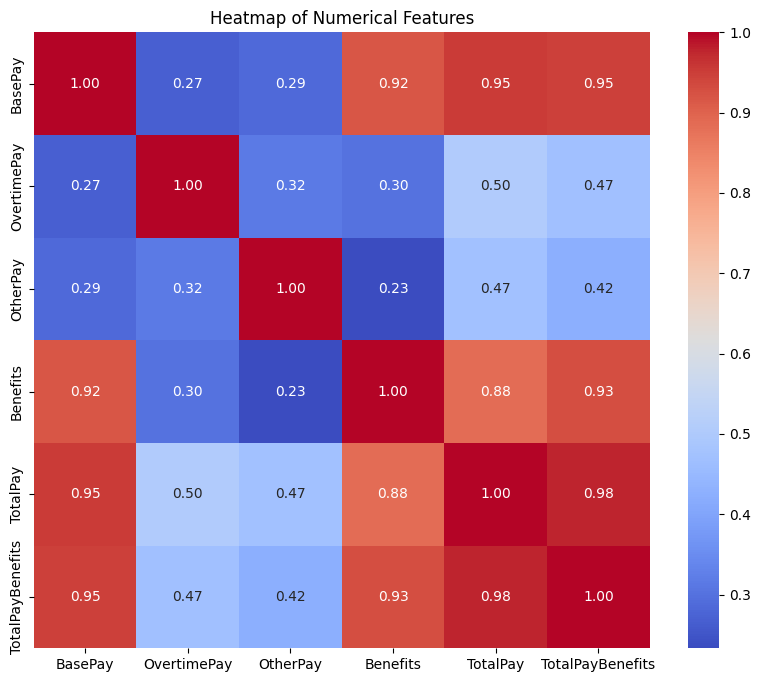

In [43]:
# heatmap to represent correlation between feature
import seaborn as sns
corr = df_num_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

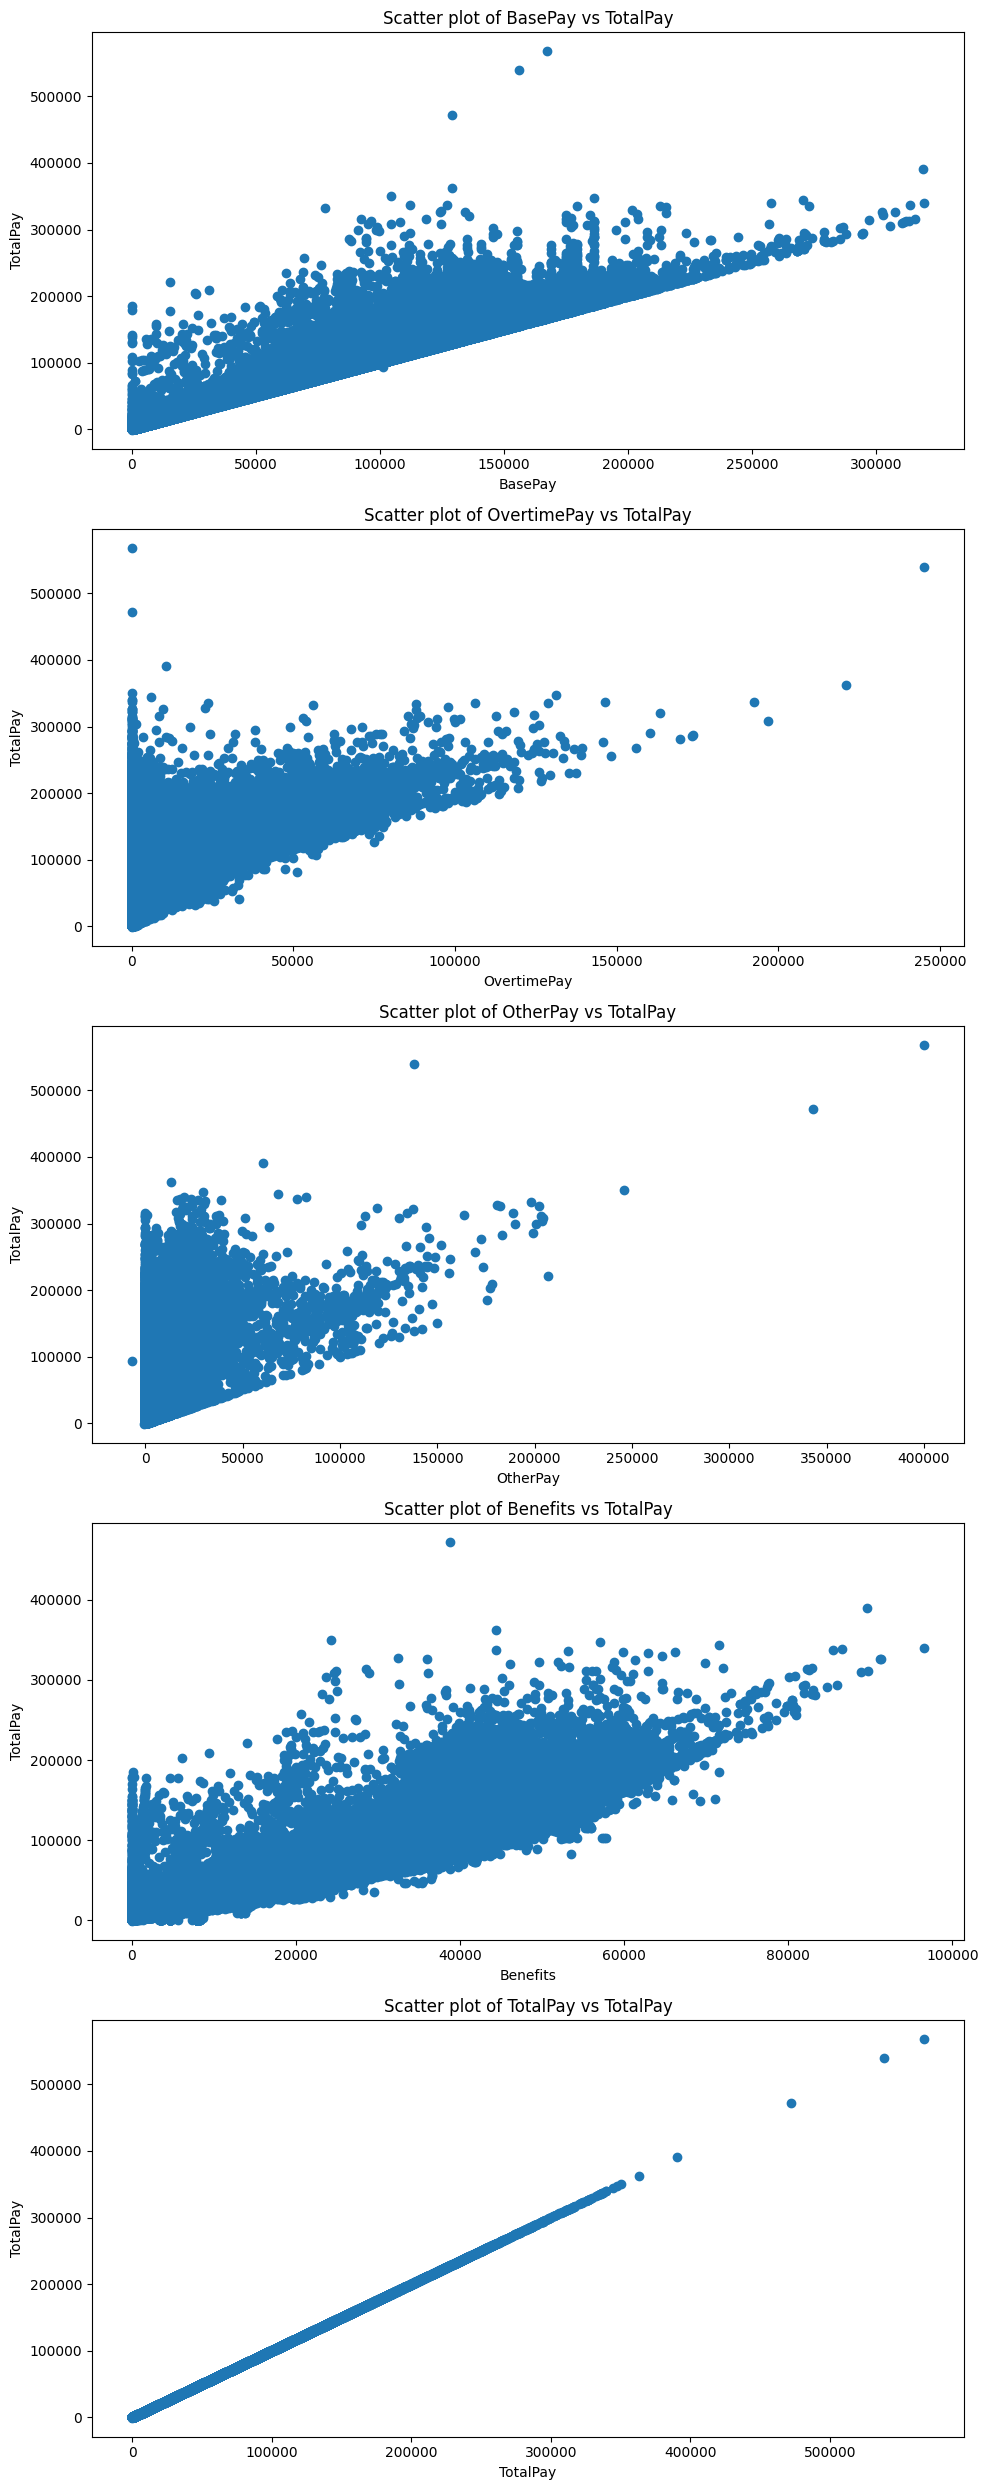

In [44]:
# scatter

# Creating scatter plots for each feature against the TotalPay
n_features = df_num_features.shape[1] - 1  # excluding the 'TotalPay' column
fig, axs = plt.subplots(n_features, figsize=(10, n_features * 5))

for i, feature in enumerate(df_num_features.columns[:-1]):  # excluding 'TotalPay'
    axs[i].scatter(df_num_features[feature], df_num_features['TotalPay'])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('TotalPay')
    axs[i].set_title(f'Scatter plot of {feature} vs TotalPay')

plt.tight_layout()
plt.show()


# Good Luck!